In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. 데이터 선택/분리

In [2]:
df = pd.read_csv("./csvfiles/mldata/KNN_Project_Data.csv")

In [3]:
x = df.drop('TARGET CLASS', axis =1)
y = df['TARGET CLASS']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=777)

# 2. 알고리즘 선택/학습/예측

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
# n_neighbors : 사람이 지정해줘야 하는 하이퍼 파라미터
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

# 3. 모델 평가

In [32]:
confusion_matrix(y_test, predictions)

array([[113,  38],
       [ 32, 117]], dtype=int64)

In [33]:
accuracy_score(y_test, predictions)

0.7666666666666667

In [34]:
np.mean(y_test.values == predictions)

0.7666666666666667

In [35]:
knn.score(x_test, y_test)

0.7666666666666667

# 최적 n_neighbors를 구하기 위한 for문

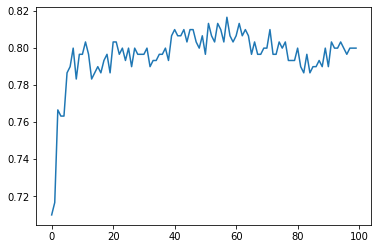

In [36]:
accuracys = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    acc = accuracy_score(y_test, predictions) #knn.score(x_test, y_test)
    accuracys.append(acc)
plt.plot(range(len(accuracys)), accuracys)

In [11]:
## for문을 통해 구한 n_neighbors를 입력하여 예측/평가

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
predictions2 = knn.predict(x_test)
knn.score(x_test, y_test)

0.7966666666666666

In [39]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.80      0.79      0.79       149

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



## 모델의 성능향상을 위해 데이터 스케일링

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
# sc.fit(x)
# sc.transform(x)
x = sc.fit_transform(x)

## 스케일링 후 데이터 분리/학습/예측

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=11)

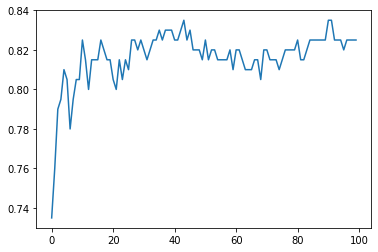

In [64]:
accs = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predictions3 = knn.predict(x_test)
    acc = accuracy_score(y_test, predictions3) #knn.score(x_test, y_test)
    accs.append(acc)
plt.plot(range(len(accs)), accs)

In [65]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train, y_train)
predictions4 = knn.predict(x_test)
knn.score(x_test, y_test)

0.83

In [119]:
df = pd.read_csv("./csvfiles/mldata/Classified Data.csv", index_col=0)

## 독립/종속변수 설정

In [124]:
x = df.drop('TARGET CLASS', axis =1)
y = df['TARGET CLASS']

## 데이터분리

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111)

## 알고리즘 선택/학습/예측

In [127]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

## 모델평가

In [131]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        97
           1       0.93      0.91      0.92       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [132]:
knn.score(x_test, y_test)

0.92

## 최적의 하이퍼파라미터 탐색

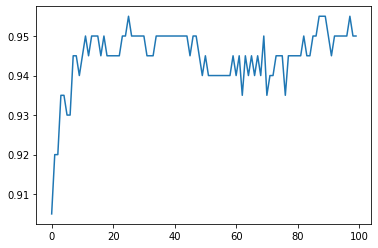

In [72]:
accuracys = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    acc = accuracy_score(y_test, predictions) #knn.score(x_test, y_test)
    accuracys.append(acc)
plt.plot(range(len(accuracys)), accuracys)

## 탐색결과로 얻은 하이퍼파라미터를 대입하여 예측/평가

In [81]:
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
knn.score(x_test, y_test)

0.955

In [82]:
accuracy_score(y_test, predictions)

0.955

In [83]:
knn.score(x_test, y_test)

0.955

In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        97
           1       0.94      0.98      0.96       103

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



## 데이터표준화

In [133]:
x = sc.fit_transform(x)

## 표준화된 데이터를 사용하여 재탐색

In [134]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=777)

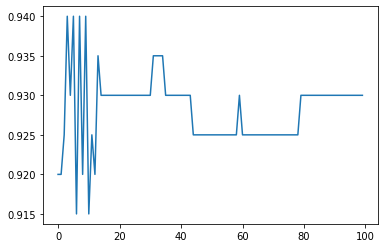

In [136]:
accuracys = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    acc = accuracy_score(y_test, predictions) #knn.score(x_test, y_test)
    accuracys.append(acc)
plt.plot(range(len(accuracys)), accuracys)

# 재학습/예측/평가

In [137]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
knn.score(x_test, y_test)

0.94

In [138]:
accuracy_score(y_test, predictions)

0.94